In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [9]:
branch = pd.read_csv('data/branch.csv')
branchless = branch[branch['branchless'] == 1]
branch = branch[branch['branchless'] == 0]
branchless

,probability,cycles,branchless
101,0,1.63205,1
102,1,1.62193,1
103,2,1.64844,1
104,3,1.62628,1
105,4,1.62825,1
...,...,...,...
197,96,1.62944,1
198,97,1.64676,1
199,98,1.63615,1
200,99,1.63444,1


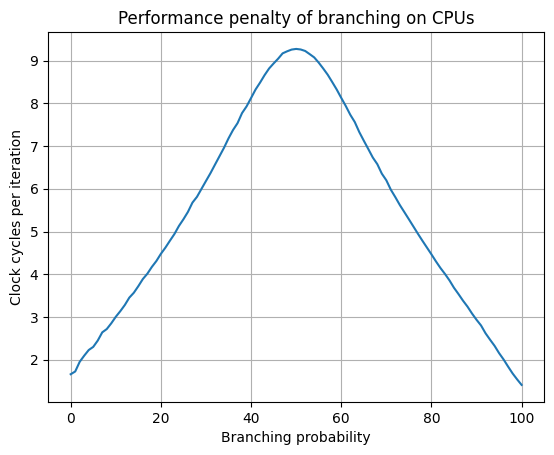

In [11]:
x = list(branch['probability'])
y = list(branch['cycles'])
# plt.xticks(x)
plt.plot(x, y)
plt.xlabel('Branching probability')
plt.ylabel('Clock cycles per iteration')
plt.title("Performance penalty of branching on CPUs")
plt.grid(True)
plt.show()

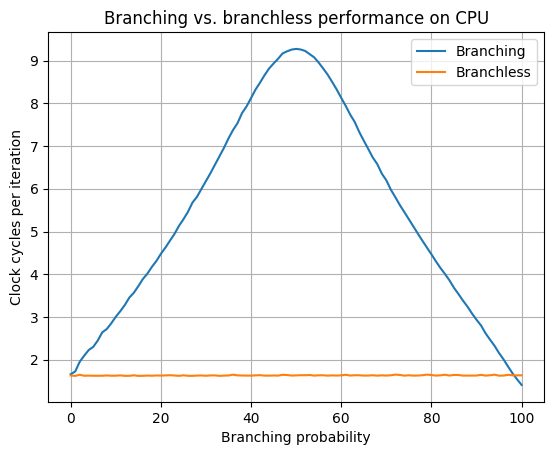

In [12]:
x = list(branch['probability'])
y = list(branch['cycles'])
# plt.xticks(x)
plt.plot(x, y, label='Branching')

y = list(branchless['cycles'])
plt.plot(x, y, label='Branchless')
plt.xlabel('Branching probability')
plt.ylabel('Clock cycles per iteration')
plt.title("Branching vs. branchless performance on CPU")
plt.grid(True)
plt.legend()
plt.show()
plt.savefig('branchless.pdf')

In [49]:
latency = pd.read_csv('data/latency.csv')
latency = latency.drop(columns=['iterations', 'real_time', 'bytes_per_second', 'items_per_second',
    'label', 'error_occurred', 'error_message', 'Nodes', 'Read Rate', 'Size', 'time_unit'])
latency

,name,cpu_time
0,memory_latency_list/size KB:1,1.88726
1,memory_latency_list/size KB:2,1.88480
2,memory_latency_list/size KB:4,1.88496
3,memory_latency_list/size KB:8,3.80355
4,memory_latency_list/size KB:16,3.80349
5,memory_latency_list/size KB:32,3.79045
6,memory_latency_list/size KB:64,3.79570
7,memory_latency_list/size KB:128,6.19455
8,memory_latency_list/size KB:256,11.89620
9,memory_latency_list/size KB:512,17.64150


In [50]:
def nameToKB(name):
    return int(name.split(':')[-1])

In [51]:
latency['size'] = list(map(nameToKB, latency['name']))
latency = latency.drop(columns=['name'])
latency

,cpu_time,size
0,1.88726,1
1,1.88480,2
2,1.88496,4
3,3.80355,8
4,3.80349,16
5,3.79045,32
6,3.79570,64
7,6.19455,128
8,11.89620,256
9,17.64150,512


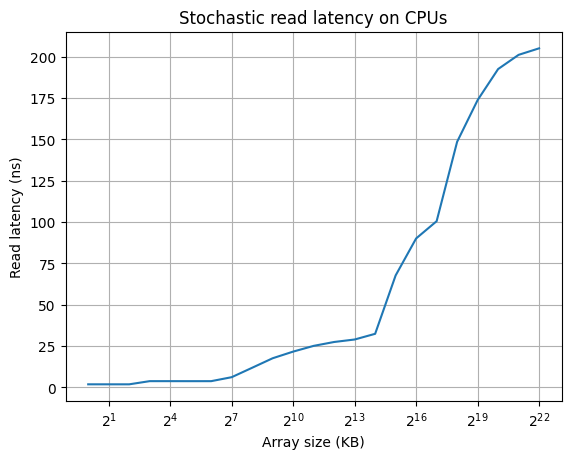

In [57]:
x = list(latency['size']) 
y = list(latency['cpu_time'])
plt.xticks(x)
plt.plot(x, y, label='Read latency')
plt.xlabel('Array size (KB)')
plt.ylabel('Read latency (ns)')
plt.xscale('log', base=2)
plt.title("Stochastic read latency on CPUs")
plt.grid(True)
# plt.legend()s
plt.show()